In [1]:
#MEMASUKKAN PUSTAKA YANG DIBUTUHKAN
import scipy

import numpy
from numpy import sqrt

import matplotlib
from matplotlib import pyplot

import sklearn
from sklearn.metrics import mean_squared_error


import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.stattools import adfuller


import pandas
from pandas import DataFrame
from pandas import datetime
from pandas import Series
from pandas import read_csv


from itertools import chain


import warnings


from math import sqrt
from math import exp
from math import log

import numpy
from statsmodels.tsa.arima_model import ARIMA

import numpy


from platform import python_version
print(python_version())

pandas.__version__

numpy.__version__

matplotlib.__version__


sklearn.__version__

statsmodels.__version__

scipy.__version__

In [2]:
# Memasukkan Data Mentah
#def parser(x):
#	return datetime.strptime(x, '%Y-%m')
series = read_csv('produksi-teh-indonesia.csv', header=0, index_col=0, parse_dates=[0], infer_datetime_format=True)#, date_parser=parser)
# Menampilkan Wujud Sebagian Data
print('Produksi Teh Indonesia Tahun Pertama')
print()
print(series.head(12))
print()
print('Produksi Teh Indonesia Tahun Terakhir')
print()
print(series.tail(12))

Produksi Teh Indonesia Tahun Pertama

             Jumlah Ton
Tahun-Bulan            
2006-01-01        12011
2006-02-01        14252
2006-03-01        17008
2006-04-01        15256
2006-05-01        14593
2006-06-01        13620
2006-07-01        10178
2006-08-01         9677
2006-09-01         8132
2006-10-01         7791
2006-11-01        10102
2006-12-01        20170

Produksi Teh Indonesia Tahun Terakhir

             Jumlah Ton
Tahun-Bulan            
2016-01-01        13175
2016-02-01        11606
2016-03-01        11621
2016-04-01        12804
2016-05-01        11706
2016-06-01        11374
2016-07-01        10929
2016-08-01        11391
2016-09-01        10699
2016-10-01        10984
2016-11-01        10974
2016-12-01        11508


In [3]:
mean = 0
var = 0
adf = 0
trans = 0
differ = 0

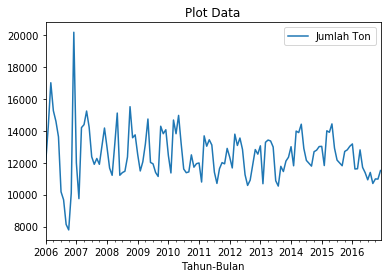

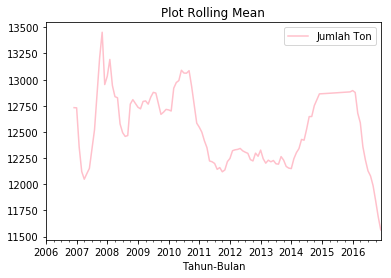

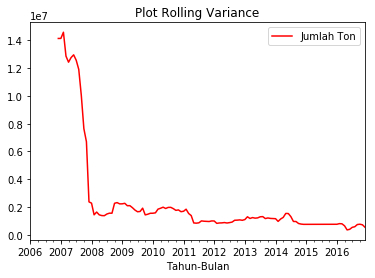

In [4]:
#Membuat Kurva Rolling Mean dan Rolling Variance
rolling = series.rolling(window=12)
rolling_mean = rolling.mean()
rolling_var = rolling.var()
series.plot()
pyplot.title('Plot Data')
rolling_mean.plot(color='pink')
pyplot.title('Plot Rolling Mean')
rolling_var.plot(color='red')
pyplot.title('Plot Rolling Variance')
pyplot.show()
#print(rolling_mean.tail(12))
#rolling_std = rolling.std()
#rolling_std.plot(color='green')

def round_10(n):
    a = (n//10)*10
    b = a + 10
    return (b if n-a > b-n else a)

def rounder(n):
    #l = len(str(round(n)))
    #if (l < 2):
    #   return (round(n))
    #else:
    #    a = (n//10**(l-2))*(10**(l-2))
    #    b = a + (10**(l-2))
    #    #print (l)
    #    return (b if n-a else a)
    a = (n//(10**)*(l-2)))*(10**(l-2))
    b = (a + (10**((l-1)*(l-2))))
    return (round(b) if n-a > b-n else round(a))

In [5]:
# Fungsi Pembulatan Angka Ke Kelipatan 10^(n-1) Terdekat
def rounder(n):
    if (n<1):
        l = len(str(n))
        ln = round(0.5*l)
        a = (n//10**(-(l-2)))*(10**(-(l-2)))
        b = a + 10**(-(l-2))
        return (round(b,ln)) #if ((a > 0) & (b > 0) & (n-a > b-n)) else round(a,ln))        
    else:
        l = len(str(round(int(n))))
        a = (n//10**(l-2))*(10**(l-2))
        b = a + 10**(l-2)
        return (round(b))# if ((a > 0) & (b > 0) & (n-a > b-n)) else round(a))

In [6]:
# Fungsi Pembagian Data Menjadi Dua Bagian
def stat_split(dataset):
    global split, part1, part2
    split = len(dataset) // 2
    part1, part2 = dataset[0:split], dataset[split:]

In [7]:
def mean_split(dataset):
    global mean, mean1, mean2, rmean1, rmean2
    mean1, mean2 = part1.mean(), part2.mean()
    rmean1, rmean2 = int(rounder(mean1)), int(rounder(mean2))

def mean_print(dataset):
    print('Mean 1 = %f ~ %d, Mean 2 = %f ~ %d' % (mean1, rmean1, mean2, rmean2))

# Fungsi Pengecekan Konsistensi Mean Dua Bagian Data    
def mean_check(dataset):
    global mean
    if (rmean1 == rmean2):
        mean = 0
    else: 
        mean = 1
    if (mean == 0):
        print('Mean Comparison: %d = %d'%(rmean1,rmean2))
        print('Data has Mean Stationary')
    if (mean == 1):
        print('Mean Comparison: %d != %d'%(rmean1,rmean2))
        print('Data does not have Mean Stationarity')
    print()
    return mean

In [8]:
def var_split(dataset):
    global var1, var2, rvar1, rvar2
    var1, var2 = (part1.var()), (part2.var())
    rvar1, rvar2 = int(rounder(var1)), int(rounder(var2))

def var_print(dataset):
    print ('Variance 1 = %f ~ %d, Variance 2 = %f ~ %d' % (var1, rvar1, var2, rvar2))

# Fungsi Pengecekan Konsistensi Variansi Dua Bagian Data   
def var_check(dataset):
    global var
    if (rvar1 == rvar2):
        var = 0
    else:
        var = 1
    if (var == 0):
        print('Variance Comparison: %d = %d'%(rvar1,rvar2))
        print('Data has Variance Stationarity')
    if (var == 1):
        print('Variance Comparison: %d != %d'%(rvar1,rvar2))
        print('Data does not have Variance Stationarity') 
    print()
    return var

In [9]:
# Membuat Pengujian Augmented Dicky Fuller
def adf_check(dataset):
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(dataset)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print()
    #print (result[4]['5%'])
    if (result[0] < result[4]['5%']):
        print('ADF Statistic < Critical Value 5% --> Data is Stationary')
        adf = 1
    else:
        print('ADF Statistic > Critical Value 5% --> Data is not Stationary')
        adf = 0
##https://machinelearningmastery.com/time-series-data-stationary-python/

In [10]:
series = series.values
stat_split(series)

series = list(map(int, series))
adf_check(series)

#series = pandas.Series(series)
#series = numpy.array(series)
#series = list(chain(*series))

ADF Statistic: -1.818312
p-value: 0.371409
Critical Values:
	10%: -2.580
	1%: -3.487
	5%: -2.886

ADF Statistic > Critical Value 5% --> Data is not Stationary


In [11]:
mean_split(series)
mean_print(series)
mean_check(series)

Mean 1 = 12744.651515 ~ 13000, Mean 2 = 12293.651515 ~ 13000
Mean Comparison: 13000 = 13000
Data has Mean Stationary



0

In [12]:
var_split(series)
var_print(series)
var_check(series)

Variance 1 = 3764079.136134 ~ 3800000, Variance 2 = 1005166.105831 ~ 1100000
Variance Comparison: 3800000 != 1100000
Data does not have Variance Stationarity



1

# Pembagian Data untuk Train-Test
global train1, test1, train2, test2, train3, test3, train4, test4, train5, test5

split1 = len(series) - (12)
train1, test1 = series[0:split1], series[split1:]
print('Training Data 1: %d, Testing Data 1: %d' % (len(train1), len(test1)))
train1 = pandas.Series(train1)
test1 = pandas.Series(test1)
train1.to_csv('PredictTea-train1.csv')
test1.to_csv('PredictTea-test1.csv')

split2 = len(series) - (12*2)
train2, test2 = series[0:split2], series[split2:]
train2 = pandas.Series(train2)
test2 = pandas.Series(test2)
print('Training Data 2: %d, Testing Data 2: %d' % (len(train2), len(test2)))
train2.to_csv('PredictTea-train2.csv')
test2.to_csv('PredictTea-test2.csv')

split3 = len(series) - (12*3)
train3, test3 = series[0:split3], series[split3:]
train3 = pandas.Series(train3)
test3 = pandas.Series(test3)
print('Training Data 3: %d, Testing Data 3: %d' % (len(train3), len(test3)))
train3.to_csv('PredictTea-train3.csv')
test3.to_csv('PredictTea-test3.csv')

split4 = len(series) - (12*4)
train4, test4 = series[0:split4], series[split4:]
train4 = pandas.Series(train4)
test4 = pandas.Series(test4)
print('Training Data 4: %d, Testing Data 4: %d' % (len(train4), len(test4)))
train4.to_csv('PredictTea-train4.csv')
test4.to_csv('PredictTea-test4.csv')

split5 = len(series) - (12*5)
train5, test5 = series[0:split5], series[split5:]
train5 = pandas.Series(train5)
test5 = pandas.Series(test5)
print('Training Data 5: %d, Testing Data 5: %d' % (len(train5), len(test5)))
train5.to_csv('PredictTea-train5.csv')
test5.to_csv('PredictTea-test5.csv')

In [13]:
for n in range(1,6):
    split = len(series) - n*(12)
    train, test = series[0:split], series[split:]
    print('Training Data %d: %d, Testing Data %d: %d' % (n, len(train), n, len(test)))
    if (n==1):
        train1 = pandas.Series(train)
        test1 = pandas.Series(test)
        train1.to_csv('PredictTea-train-1.csv')
        test1.to_csv('PredictTea-test-1.csv')
    if (n==2):
        train2 = pandas.Series(train)
        test2 = pandas.Series(test)
        train2.to_csv('PredictTea-train-2.csv')
        test2.to_csv('PredictTea-test-2.csv')
    if (n==3):
        train3 = pandas.Series(train)
        test3 = pandas.Series(test)
        train3.to_csv('PredictTea-train-3.csv')
        test3.to_csv('PredictTea-test-3.csv')
    if (n==4):
        train4 = pandas.Series(train)
        test4 = pandas.Series(test)
        train4.to_csv('PredictTea-train-4.csv')
        test4.to_csv('PredictTea-test-4.csv')
    if (n==5):
        train5 = pandas.Series(train)
        test5 = pandas.Series(test)
        train5.to_csv('PredictTea-train-5.csv')
        test5.to_csv('PredictTea-test-5.csv')

Training Data 1: 120, Testing Data 1: 12
Training Data 2: 108, Testing Data 2: 24
Training Data 3: 96, Testing Data 3: 36
Training Data 4: 84, Testing Data 4: 48
Training Data 5: 72, Testing Data 5: 60


/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':
/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]
/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: Fut

In [14]:
def transform(dataset):
    global trans
    X = numpy.array(dataset)
    X = numpy.sqrt(X)
    trans = trans+1
    dataset = X
    return dataset

def difference(dataset, interval=12):
    global differ
    #X = pandas.Series(dataset)
    #X = X.diff(periods=12)
    #X = X[12:]
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    differ = differ+1
    diff = numpy.asarray(diff)
    dataset = diff
    return dataset

In [15]:
global maxd
if (var==1):
    while (var > 0):
        series_edit = transform(series)
        print ('Transformation:', trans)
        stat_split(series_edit)
        var_split(series_edit)
        var_check(series_edit)
        series = series_edit
        print()
else: 
    trans = 0
if (mean==1):
    while (mean > 0):
        series_edit = difference(series)
        print ('Differencing:', differ)
        stat_split(series_edit)
        mean_split(series_edit)
        mean_check(series_edit)
        series = series_edit
        print()
else:
    differ = 0
n_trans = trans
n_differ = differ
maxd = trans + differ
print('Maximum d should be', maxd)
    

Transformation: 1
Variance Comparison: 74 != 21
Data does not have Variance Stationarity


Transformation: 2
Variance Comparison: 0 = 0
Data has Variance Stationarity


Maximum d should be 2


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF & PACF
def plot_autocorr(dataset): 
    pyplot.figure()
    pyplot.suptitle('Autocorrelation Function (ACF) & Partial ACF (PACF) Plot')
    #pyplot.subplot(211)
    plot_acf(series_edit, ax=pyplot.gca())
    pyplot.show()
    #pyplot.subplot(212)
    plot_pacf(series_edit, ax=pyplot.gca())
    pyplot.show()

def subplot_autocorr(dataset, int):
    # Sub-plot ACF & PACF
    plot_acf(series_edit, lags=int)
    pyplot.suptitle('N-Lag Autocorrelation Function (ACF) & Partial ACF (PACF) Plot')
    pyplot.show()
    plot_pacf(series_edit, lags=int)
    pyplot.show()

#Plot ACF:
pyplot.figure(figsize=(16, 7))
pyplot.plot(lag_acf,marker='o')
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.title('Autocorrelation Function')
pyplot.xlabel('number of lags')
pyplot.ylabel('correlation')
pyplot.tight_layout()

#Plot PACF:
pyplot.figure(figsize=(16, 7))
pyplot.plot(lag_pacf,marker='o')
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/sqrt(len(X)),linestyle='--',color='gray')
pyplot.title('Partial Autocorrelation Function')
pyplot.xlabel('Number of lags')
pyplot.ylabel('correlation')
pyplot.tight_layout()

In [17]:
from statsmodels.tsa.stattools import acf, pacf 
#acf = []
#pacf = []

# Penentuan Derajat q dari Fungsi ACF
def acf_check(dataset, int):
    global maxq
    lag = range(0,int)
    lag_acf = acf(dataset, nlags=int)
    for l in lag:
        if (lag_acf[l] < 0.2):
            maxq = l
            print ('Maximum q should be: ', maxq)
            #return maxq
            break
            
# Penentuan Derajat p dari Fungsi PACF
def pacf_check(dataset, int):   
    global maxp
    lag = range(0,int)
    lag_pacf = pacf(dataset, nlags=int, method='ols')
    for l in lag:
        if (lag_pacf[l] < 0.2):
            maxp = l
            print ('Maximum p should be: ', maxp)
            #return maxp
            break

lag = range(0,10)
acf = [] 
pacf = []
for l in lag: 
    pacf.append(X.autocorr(l).round(2)) 
    if (pacf[l] < 0):
        p = l
        print ('Maximum p should be: ', p)
        break

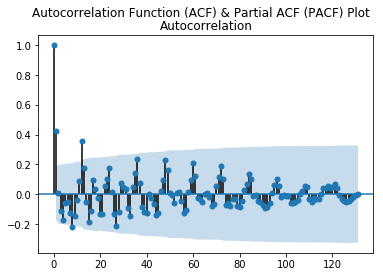

/home/nurul/.local/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


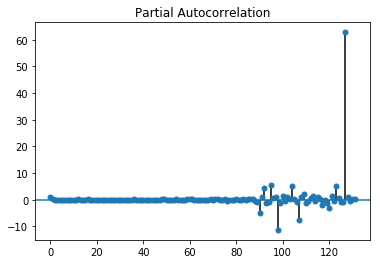

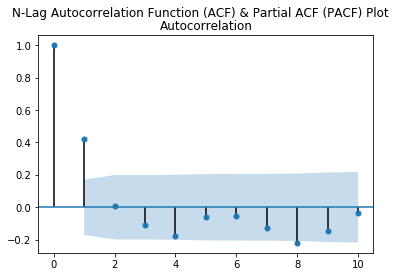

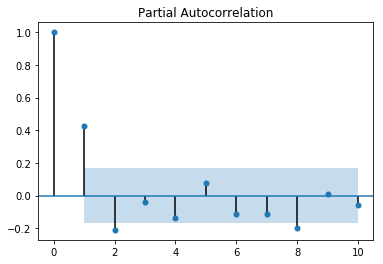

Maximum q should be:  2
Maximum p should be:  2


In [18]:
plot_autocorr(series_edit)
subplot_autocorr(series_edit, 10)
acf_check(series_edit, 10)
pacf_check(series_edit,10)

In [19]:
series_edit = pandas.Series(series_edit)
series_edit.to_csv('PredictTea-edit.csv')

/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


# Pembagian Data untuk Train-Test
global train1_edit, test1_edit, train2_edit, test2_edit, train3_edit, test3_edit, train4_edit, test4_edit, train5_edit, test5_edit

split1_edit = len(series_edit) - (12)
train1_edit, test1_edit = series_edit[0:split1_edit], series_edit[split1_edit:]
print('Adjusted Training Data 1: %d, Adjusted Testing Data 1: %d' % (len(train1_edit), len(test1_edit)))
#train1_edit = pandas.Series(train1_edit)
#test1_edit = pandas.Series(test1_edit)
train1_edit.to_csv('PredictTea-train1-edit.csv')
test1_edit.to_csv('PredictTea-test1-edit.csv')

split2_edit = len(series_edit) - 2*(12)
train2_edit, test2_edit = series_edit[0:split2_edit], series_edit[split2_edit:]
print('Adjusted Training Data 2: %d, Adjusted Testing Data 2: %d' % (len(train2_edit), len(test2_edit)))
#train2_edit = pandas.Series(train2_edit)
#test2_edit = pandas.Series(test2_edit)
train2_edit.to_csv('PredictTea-train2-edit.csv')
test2_edit.to_csv('PredictTea-test2-edit.csv')

split3_edit = len(series_edit) - 3*(12)
train3_edit, test3_edit = series_edit[0:split3_edit], series_edit[split3_edit:]
print('Adjusted Training Data 3: %d, Adjusted Testing Data 3: %d' % (len(train3_edit), len(test3_edit)))
##train3_edit = pandas.Series(train3_edit)
#test3_edit = pandas.Series(test3_edit)
train3_edit.to_csv('PredictTea-train3-edit.csv')
test3_edit.to_csv('PredictTea-test3-edit.csv')

split4_edit = len(series_edit) - 4*(12)
train4_edit, test4_edit = series_edit[0:split4_edit], series_edit[split4_edit:]
print('Adjusted Training Data 4: %d, Adjusted Testing Data 4: %d' % (len(train4_edit), len(test4_edit)))
##train4_edit = pandas.Series(train4_edit)
#test4_edit = pandas.Series(test4_edit)
train4_edit.to_csv('PredictTea-train4-edit.csv')
test4_edit.to_csv('PredictTea-test4-edit.csv')

split5_edit = len(series_edit) - 5*(12)
train5_edit, test5_edit = series_edit[0:split5_edit], series_edit[split5_edit:]
print('Adjusted Training Data 5: %d, Adjusted Testing Data 5: %d' % (len(train5_edit), len(test5_edit)))
#train5_edit = pandas.Series(train5_edit)
#test5_edit = pandas.Series(test5_edit)
train5_edit.to_csv('PredictTea-train5-edit.csv')
test5_edit.to_csv('PredictTea-test5-edit.csv')

type(train1_edit)

In [20]:
for n in range(1,6):
    split = len(series_edit) - n*(12)
    train, test = series[0:split], series[split:]
    print('Adjusted Training Data %d: %d, Adjusted Testing Data %d: %d' % (n, len(train), n, len(test)))
    if (n==1):
        train1_edit = pandas.Series(train)
        test1_edit = pandas.Series(test)
        train1_edit.to_csv('PredictTea-train-edit1.csv')
        test1_edit.to_csv('PredictTea-test-edit1.csv')
    if (n==2):
        train2_edit = pandas.Series(train)
        test2_edit = pandas.Series(test)
        train2_edit.to_csv('PredictTea-train-edit2.csv')
        test2_edit.to_csv('PredictTea-test-edit2.csv')
    if (n==3):
        train3_edit = pandas.Series(train)
        test3_edit = pandas.Series(test)
        train3_edit.to_csv('PredictTea-train-edit3.csv')
        test3_edit.to_csv('PredictTea-test-edit3.csv')
    if (n==4):
        train4_edit = pandas.Series(train)
        test4_edit = pandas.Series(test)
        train4_edit.to_csv('PredictTea-train-edit4.csv')
        test4_edit.to_csv('PredictTea-test-edit4.csv')
    if (n==5):
        train5_edit = pandas.Series(train)
        test5_edit = pandas.Series(test)
        train5_edit.to_csv('PredictTea-train-edit5.csv')
        test5_edit.to_csv('PredictTea-test-edit5.csv')

Adjusted Training Data 1: 120, Adjusted Testing Data 1: 12
Adjusted Training Data 2: 108, Adjusted Testing Data 2: 24
Adjusted Training Data 3: 96, Adjusted Testing Data 3: 36
Adjusted Training Data 4: 84, Adjusted Testing Data 4: 48
Adjusted Training Data 5: 72, Adjusted Testing Data 5: 60


/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':
/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]
/home/nurul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: Fut

train1_edit = pandas.Series(train1_edit).values
test1_edit = pandas.Series(test1_edit).values
train2_edit = pandas.Series(train2_edit).values
test2_edit = pandas.Series(test2_edit).values
train3_edit = pandas.Series(train3_edit).values
test3_edit = pandas.Series(test3_edit).values
train4_edit = pandas.Series(train4_edit).values
test4_edit = pandas.Series(test4_edit).values
train5_edit = pandas.Series(train5_edit).values
test5_edit = pandas.Series(test5_edit).values

In [21]:
#PENGECEKAN FORMASI PARAMETER ARIMA TERBAIK UNTUK PEMODELAN DATA MODIF
import warnings
#from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy

# evaluate an ARIMA model
def evaluate_arima_model(train_dataset, test_dataset, arima_order):
	history = [x for x in train_dataset]
	predictions = list()
	#make predictions
	for t in range(len(test_dataset)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test_dataset[t])
	# calculate out of sample error
	error = mean_squared_error(test_dataset, predictions)
	return error

# Penentuan Formasi Terbaik Derajat Parameter
def evaluate_models(train_dataset, test_dataset, p_values, d_values, q_values):
	global best_cfg, best_score
	#train = train.astype('float32')
	#test = test.astype('float32')    
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = sqrt(evaluate_arima_model(train_dataset, test_dataset, order))
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order, rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
	#print(test)
	#print('EM')
# load dataset
#def parser(x):
#	return datetime.strptime(x, '%Y-%m')

In [22]:
train1_edit = read_csv('PredictTea-train-edit1.csv', header=0, index_col=0, squeeze=True)
train2_edit = read_csv('PredictTea-train-edit2.csv', header=0, index_col=0, squeeze=True)
train3_edit = read_csv('PredictTea-train-edit3.csv', header=0, index_col=0, squeeze=True)
train4_edit = read_csv('PredictTea-train-edit4.csv', header=0, index_col=0, squeeze=True)
train5_edit = read_csv('PredictTea-train-edit5.csv', header=0, index_col=0, squeeze=True)

test1_edit = read_csv('PredictTea-test-edit1.csv', header=0, index_col=0, squeeze=True)
test2_edit = read_csv('PredictTea-test-edit2.csv', header=0, index_col=0, squeeze=True)
test3_edit = read_csv('PredictTea-test-edit3.csv', header=0, index_col=0, squeeze=True)
test4_edit = read_csv('PredictTea-test-edit4.csv', header=0, index_col=0, squeeze=True)
test5_edit = read_csv('PredictTea-test-edit5.csv', header=0, index_col=0, squeeze=True)

In [23]:
# evaluate parameters
p_values = range(0, maxp)
d_values = range(0, maxd)
q_values = range(0, maxq)
warnings.filterwarnings("ignore")

print('Split1 ARIMA Formation Test:')
evaluate_models(train1_edit.values, test1_edit.values, p_values, d_values, q_values)
split1_cfg=best_cfg
split1_rmse=best_score
print()
print('Split2 ARIMA Formation Test:')
evaluate_models(train2_edit.values, test2_edit.values, p_values, d_values, q_values)
split2_cfg=best_cfg
split2_rmse=best_score
print()
print('Split3 ARIMA Formation Test:')
evaluate_models(train3_edit.values, test3_edit.values, p_values, d_values, q_values)
split3_cfg=best_cfg
split3_rmse=best_score
print()
print('Split4 ARIMA Formation Test:')
evaluate_models(train4_edit.values, test4_edit.values, p_values, d_values, q_values)
split4_cfg=best_cfg
split4_rmse=best_score
print()
print('Split5 ARIMA Formation Test:')
evaluate_models(train5_edit.values, test5_edit.values, p_values, d_values, q_values)
split5_cfg=best_cfg
split5_rmse=best_score

Split1 ARIMA Formation Test:
ARIMA(0, 0, 0) RMSE=0.267
ARIMA(0, 0, 1) RMSE=0.204
ARIMA(0, 1, 0) RMSE=0.161
ARIMA(0, 1, 1) RMSE=0.165
ARIMA(1, 0, 0) RMSE=0.191
ARIMA(1, 0, 1) RMSE=0.203
ARIMA(1, 1, 0) RMSE=0.155
ARIMA(1, 1, 1) RMSE=0.172
Best ARIMA(1, 1, 0) RMSE=0.155

Split2 ARIMA Formation Test:
ARIMA(0, 0, 0) RMSE=0.229
ARIMA(0, 0, 1) RMSE=0.191
ARIMA(0, 1, 0) RMSE=0.180
ARIMA(0, 1, 1) RMSE=0.190
ARIMA(1, 0, 0) RMSE=0.179
ARIMA(1, 0, 1) RMSE=0.191
ARIMA(1, 1, 0) RMSE=0.175
ARIMA(1, 1, 1) RMSE=0.173
Best ARIMA(1, 1, 1) RMSE=0.173

Split3 ARIMA Formation Test:
ARIMA(0, 0, 0) RMSE=0.216
ARIMA(0, 0, 1) RMSE=0.181
ARIMA(0, 1, 0) RMSE=0.180
ARIMA(0, 1, 1) RMSE=0.208
ARIMA(1, 0, 0) RMSE=0.173
ARIMA(1, 0, 1) RMSE=0.184
ARIMA(1, 1, 0) RMSE=0.177
ARIMA(1, 1, 1) RMSE=0.175
Best ARIMA(1, 0, 0) RMSE=0.173

Split4 ARIMA Formation Test:
ARIMA(0, 0, 0) RMSE=0.223
ARIMA(0, 0, 1) RMSE=0.197
ARIMA(0, 1, 0) RMSE=0.209
ARIMA(0, 1, 1) RMSE=0.214
ARIMA(1, 0, 0) RMSE=0.188
ARIMA(1, 0, 1) RMSE=0.201
ARIMA(1,

In [24]:
#series = pandas.Series(series)
#series = numpy.array(series)
#series = list(chain(*series))

#train1_edit = train1_edit.tolist()
#test1_edit = test1_edit.tolist()

#train1_edit =  list(chain(*train1_edit))
#test1_edit =  list(chain(*test1_edit))

#train1_edit = list(map(int, train1_edit)) 
#test1_edit = list(map(int, test1_edit)) 

#train1_edit = pandas.Series(train1_edit)
#test1_edit = pandas.Series(test1_edit) 
#print(test1_edit)

#train1_edit = train1_edit.Series.values
#test1_edit = test1_edit.Series.values

#train1_edit = train1_edit.to_numpy()
#test1_edit = test1_edit.to_numpy()

#train1_edit =  numpy.array(train1_edit)
#test1_edit =  numpy.array(test1_edit)

#train1_edit = train1_edit.values
#test1_edit = test1_edit.values

#train1_edit = train1_edit.asarray
#test1_edit = test1_edit.asarray

#train2_edit =  numpy.array(train2_edit)
#test2_edit =  numpy.array(test2_edit)

#train3_edit =  numpy.array(train3_edit)
#test3_edit =  numpy.array(test3_edit)

#train4_edit =  numpy.array(train4_edit)
#test4_edit =  numpy.array(test4_edit)

#train5_edit =  numpy.array(train4_edit)
#test5_edit =  numpy.array(test5_edit)

#train1_edit = pandas.Series(train1_edit).array
#test1_edit = pandas.Series(test1_edit).array

In [25]:
if (int(split4_rmse) <= int(split5_rmse)):
    print('Best Using Split4')
    best_cfg = split4_cfg
    test_edit = test4_edit
    train_edit = train4_edit
elif (int(split3_rmse) <= int(split4_rmse)):
    print('Best Using Split3')
    best_cfg = split3_cfg
    test_edit = test3_edit
    train_edit = train3_edit
elif (int(split2_rmse) <= int(split3_rmse)):
    print('Best Using Split2')
    best_cfg = split2_cfg
    test_edit = test2_edit
    train_edit = train2_edit
elif (int(split1_rmse) <= int(split2_rmse)):
    print('Best Using Split1')
    best_cfg = split1_cfg
    test_edit = test1_edit
    train_edit = train1_edit
else:
    print('Best Using Split5')
    best_cfg = split5_cfg
    test_edit = test5_edit
    train_edit = train5_edit

Best Using Split4


predicted = 10.580832, expected = 10.166543
predicted = 10.408617, expected = 10.734735
predicted = 10.639834, expected = 10.763119
predicted = 10.652720, expected = 10.751269
predicted = 10.649452, expected = 10.674613
predicted = 10.619430, expected = 10.211214
predicted = 10.432506, expected = 10.131388
predicted = 10.393906, expected = 10.416499
predicted = 10.508835, expected = 10.343629
predicted = 10.477388, expected = 10.488305
predicted = 10.535837, expected = 10.540781
predicted = 10.557035, expected = 10.678516
predicted = 10.613782, expected = 10.424012
predicted = 10.509553, expected = 10.873881
predicted = 10.692437, expected = 10.855557
predicted = 10.687979, expected = 10.956543
predicted = 10.733539, expected = 10.656480
predicted = 10.610394, expected = 10.497610
predicted = 10.545011, expected = 10.459585
predicted = 10.528754, expected = 10.419595
predicted = 10.511372, expected = 10.613248
predicted = 10.590864, expected = 10.633474
predicted = 10.599460, expected 

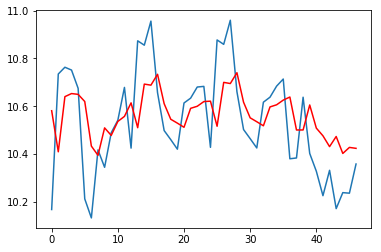

In [26]:
## from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy
import pandas

train_edit = train_edit.values
test_edit = test_edit.values

history = [x for x in train_edit]
predicted = list()

for t in range(len(test_edit)):
	model = ARIMA(history, order=(best_cfg[0],best_cfg[1],best_cfg[2]))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predicted.append(yhat)
	obs = test_edit[t]
	history.append(obs)
	print('predicted = %f, expected = %f' % (yhat, obs))
error = mean_squared_error(test_edit, predicted)
rmse = sqrt(error)
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test_edit)
pyplot.plot(predicted, color='red')
pyplot.show()

In [27]:
# Pembuatan Inversi Tranformasi
def invert_trans(dataset):
    invert_trans = numpy.square(dataset)
    dataset = invert_trans
    return dataset

# Pembuatan Inversi Differencing
def invert_differ(dataset):
    for yhat in predictions:
        dataset = yhat + history[-12]
    return dataset

In [28]:
predictions = [list(p) for p in predicted]
#X = list(chain(*predicted))
if (trans >  0):
    while (trans > 0):
        print ('Invert Transformation -', trans)
        predictions = invert_trans(predictions)
        print(predictions[-6:])
        var_split(predictions)
        var_check(predictions)
        trans=trans-1    
if (differ > 0):
    while (differ > 0):
        print ('Invert Differencing -', trans)
        predictions = invert_differ(predictions)
        print(predictions[-6:])
        mean_split(predictions)
        mean_check(predictions)
        differ=differ-1 

Invert Transformation - 2
[[109.73906219]
 [108.79125133]
 [109.67747924]
 [108.19545451]
 [108.72254137]
 [108.64022521]]
Variance Comparison: 0 = 0
Data has Variance Stationarity

Invert Transformation - 1
[[12042.66176957]
 [11835.53636586]
 [12029.14945349]
 [11706.25637712]
 [11820.59100087]
 [11802.69853361]]
Variance Comparison: 0 = 0
Data has Variance Stationarity



In [29]:
from itertools import chain
predictions = list(map(int, predictions))
#predictions = pandas.Series(predictions)
#predictions = round(predictions)

for t in range(len(predictions)):
	yhat = predictions[t]
	obs = test4[t]
	print('predicted = %d, expected = %d' % (yhat, obs))

predicted = 12533, expected = 13057
predicted = 11737, expected = 10683
predicted = 12815, expected = 13279
predicted = 12877, expected = 13420
predicted = 12862, expected = 13361
predicted = 12717, expected = 12984
predicted = 11845, expected = 10872
predicted = 11671, expected = 10536
predicted = 12196, expected = 11773
predicted = 12050, expected = 11447
predicted = 12321, expected = 12101
predicted = 12421, expected = 12345
predicted = 12690, expected = 13003
predicted = 12199, expected = 11807
predicted = 13070, expected = 13981
predicted = 13049, expected = 13887
predicted = 13273, expected = 14411
predicted = 12674, expected = 12896
predicted = 12364, expected = 12144
predicted = 12288, expected = 11969
predicted = 12207, expected = 11787
predicted = 12581, expected = 12688
predicted = 12622, expected = 12785
predicted = 12716, expected = 13011
predicted = 12724, expected = 13024
predicted = 12227, expected = 11822
predicted = 13106, expected = 14000
predicted = 13082, expected 

#!! https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/ 

https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

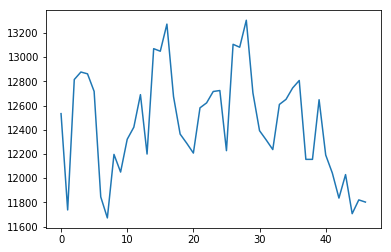

In [30]:
#for i in range(0, len(X)):
#    X[i] = int(X[i])
#predictions = list(map(int, predictions)) 
#predictions = pandas.Series(predictions)
#predictions = round(predictions)
#print(predictions)

pyplot.plot(predictions)
pyplot.show()
#var_check(X)
#mean_check(X)

# fit model
model = ARIMA(train_edit, order=(best_cfg[0],best_cfg[1],best_cfg[2]))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=12)
# invert the differenced forecast to something usable
history = [x for x in series_edit]
day = 1

#forecasts = [list(f) for f in forecast]
#X = list(chain(*predicted))
if (trans >  0):
    while (trans > 0):
        #print ('Invert Transformation -', trans)
        forecast = invert_trans(forecast)
        var_split(forecast)
        var_check(forecast)
        trans=trans-1    
if (differ > 0):
    while (differ > 0):
        #print ('Invert Differencing -', trans)
        forecast = invert_differ(forecast)
        print
        mean_split(forecast)
        mean_check(forecast)
        differ=differ-1 
print(forecast)         

In [31]:
# fit model
model = ARIMA(train_edit, order=(best_cfg[0],best_cfg[1],best_cfg[2]))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(train_edit)
end_index = start_index + 11
forecast = model_fit.predict(start=start_index, end=end_index)
print(n_trans)
print(n_differ)
# invert the differenced forecast to something usable
if (n_trans >  0):
    while (n_trans > 0):
        #print ('Invert Transformation -', trans)
        forecast = invert_trans(forecast)
        var_split(forecast)
        var_check(forecast)
        n_trans=n_trans-1    
if (n_differ > 0):
    while (n_differ > 0):
        #print ('Invert Differencing -', trans)
        forecast = invert_differ(forecast)
        print
        mean_split(forecast)
        mean_check(forecast)
        n_differ=n_differ-1 
print(forecast)
date_index = pandas.date_range(start='2017-01-01', periods=len(forecast), freq='MS')
forecast = pandas.Series(forecast, index=date_index)
print(forecast)

#forecasts = forecast.reindex(date_index)
#print(forecast)
#history = [x for x in train_edit]
#for day in range(1,13):
#	print('01-%02d-2018 : %f' % (day, forecast))

2
0
Variance Comparison: 0 = 0
Data has Variance Stationarity

Variance Comparison: 0 = 0
Data has Variance Stationarity

[12533.70035526 12532.77186628 12532.39696428 12532.24558415
 12532.18445842 12532.15977639 12532.14980999 12532.14578563
 12532.14416063 12532.14350447 12532.14323951 12532.14313253]
2017-01-01    12533.700355
2017-02-01    12532.771866
2017-03-01    12532.396964
2017-04-01    12532.245584
2017-05-01    12532.184458
2017-06-01    12532.159776
2017-07-01    12532.149810
2017-08-01    12532.145786
2017-09-01    12532.144161
2017-10-01    12532.143504
2017-11-01    12532.143240
2017-12-01    12532.143133
Freq: MS, dtype: float64


In [32]:
print(n_trans)

0


In [33]:
print(n_differ)

0


In [34]:
print(pandas.Series(forecast))

2017-01-01    12533.700355
2017-02-01    12532.771866
2017-03-01    12532.396964
2017-04-01    12532.245584
2017-05-01    12532.184458
2017-06-01    12532.159776
2017-07-01    12532.149810
2017-08-01    12532.145786
2017-09-01    12532.144161
2017-10-01    12532.143504
2017-11-01    12532.143240
2017-12-01    12532.143133
Freq: MS, dtype: float64


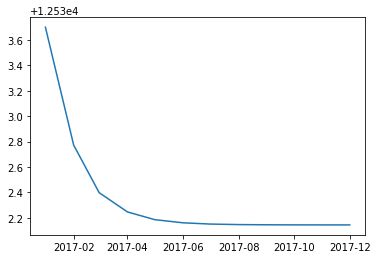

In [35]:
pyplot.plot(forecast)
pyplot.show()